In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=1000, n_features=2,
                           n_redundant=0, n_repeated=0, n_classes=2, weights=[0.1, 0.9], random_state=0)

Sử dụng hàm `make_classification` từ thư viện `sklearn.datasets` để tạo dữ liệu mô phỏng cho bài toán phân loại.
- `n_samples=1000`: Đây là số lượng mẫu dữ liệu sẽ được tạo ra, trong trường hợp này là 1000 mẫu.
- `n_features=2`: Đây là số lượng đặc trưng (features) của mỗi mẫu dữ liệu, trong trường hợp này là 2 đặc trưng.
- `n_redundant=0`: Số lượng đặc trưng lặp lại không cần thiết. Chúng có thể được xem như là sự lặp lại hoặc tuyến tính của các đặc trưng khác
- `n_repeated=0`: Số lượng đặc trưng được lặp lại (đặc trưng được sao chép).
- `n_classes=2`: Số lượng lớp (classes) trong bài toán phân loại, trong trường hợp này là 2 lớp.
- `weights=[0.1, 0.9]`: Trọng số cho mỗi lớp. Lớp thứ nhất có trọng số 0.1 và lớp thứ hai có trọng số 0.9, tức là lớp thứ hai sẽ chiếm phần lớn (90%) trong dữ liệu được tạo.
- `random_state=0`: Seed (một số ngẫu nhiên) sử dụng để tạo dữ liệu một cách ngẫu nhiên nhưng có thể tái tạo lại dữ liệu đó nếu cần thiết.

Kết quả trả về:
- `X` chứa các mẫu dữ liệu với `n_samples` hàng và `n_features` cột.
- `y` chứa nhãn tương ứng với mỗi mẫu dữ liệu trong `X`. Trong trường hợp này, `y` chứa thông tin về lớp của mỗi mẫu dữ liệu, có thể là 0 hoặc 1, tương ứng với hai lớp được tạo ra từ hàm `make_classification`.sification`.

In [4]:
print(sorted(Counter(y).items()))

[(0, 104), (1, 896)]


In [5]:
data = pd.DataFrame(X)
data['target'] = y
data.head()

,0,1,target
0,-0.868346,0.095365,1
1,0.001605,1.416898,1
2,-0.963649,1.030862,1
3,-2.298670,2.381434,1
4,-0.300886,0.744814,1


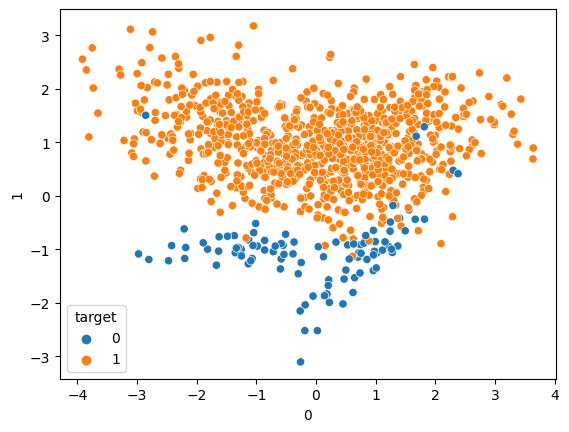

In [6]:
sns.scatterplot(data=data, x=0, y=1, hue='target')
plt.show()

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
X_S, y_S = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_S).items()))

[(0, 896), (1, 896)]


In [9]:
data_S = pd.DataFrame(X_S)
data_S['target'] = y_S
data_S.head()

,0,1,target
0,-0.868346,0.095365,1
1,0.001605,1.416898,1
2,-0.963649,1.030862,1
3,-2.298670,2.381434,1
4,-0.300886,0.744814,1


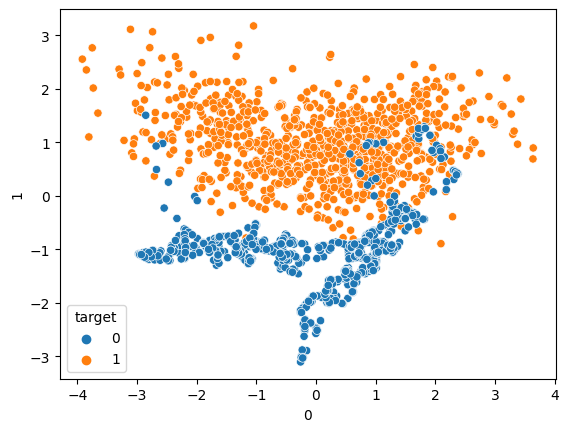

In [10]:
sns.scatterplot(data=data_S, x=0, y=1, hue='target')
plt.show()

In [11]:
data_0 = data[data.target==0]
data_1 = data[data.target==1]

In [12]:
data_0.shape, data_1.shape

((104, 3), (896, 3))

In [13]:
from sklearn.utils import resample

In [14]:
data_0_resample = resample(data_0,
                          replace=True, # sample with replacement
                          n_samples=data_1.shape[0], # match number in majority class
                          random_state=27) # reproducible results

In [15]:
upsampled = pd.concat([data_0_resample, data_1])

In [16]:
upsampled.target.value_counts()

0    896
1    896
Name: target, dtype: int64

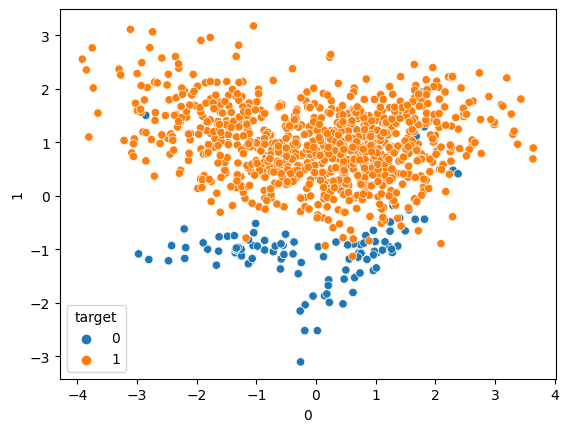

In [17]:
sns.scatterplot(data=upsampled, x=0, y=1, hue='target')
plt.show()